# Box Plots

In [1]:
# Down the file to local
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-10 20:44:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  2.36MB/s    in 1m 57s  

2025-02-10 20:46:51 (1.73 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



In [2]:
# Import all package
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connect the Database

In [3]:
conn = sqlite3.connect('survey-results-public.sqlite')

In [9]:
#  Read The database
QUERY = """
SELECT COUNT(*) FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df

,COUNT(*)
0,65437


In [5]:
# List of All Tables
QUERY ="""
SELECT name as Table_Name
FROM sqlite_master
WHERE type='table'
"""
table_info = pd.read_sql_query(QUERY, conn)
table_info

,Table_Name
0,main


In [6]:
# GROUP DATA by Age
QUERY = """
SELECT 'Age', COUNT(*) FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
df_age

,'Age',COUNT(*)
0,Age,14098
1,Age,23911
2,Age,14942
3,Age,6249
4,Age,2575
5,Age,772
6,Age,322
7,Age,2568


# VISUALIZING Data
Box plot of 'CompTotal' (Total Compensation)

In [80]:
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

In [11]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [14]:
missing_value = df['CompTotal'].isnull().sum()
missing_value

np.int64(31697)

In [15]:
df['CompTotal'] = df['CompTotal'].fillna(df['CompTotal'].mean())

CompTotal
2.963841e+145    31697
1.000000e+05       939
6.000000e+04       839
1.200000e+05       793
8.000000e+04       728
                 ...  
5.980000e+04         1
2.880500e+04         1
3.775320e+05         1
5.184000e+05         1
7.770000e+04         1
Name: count, Length: 3338, dtype: int64

In [30]:
comp_data = df['CompTotal'].value_counts()
comp_data_df = comp_data.reset_index()
comp_data_df.columns = ['CompTotal', 'Count']

## Show box plot for compensation total

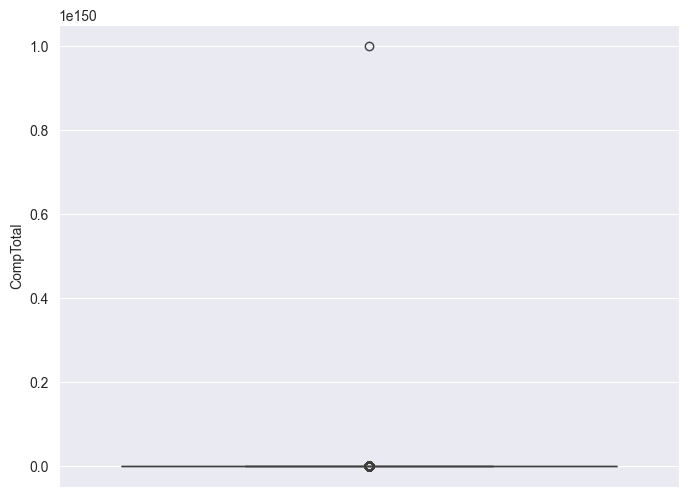

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='CompTotal', data=comp_data_df) 
plt.show()

# Box Plot of Age (converted to numeric values)

In [39]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [58]:
import re
def convert_age(column: str) -> int:
    if isinstance(column, str):
        if 'older' in column or 'Under' in column:
            match = re.search(r'\d+', column)
            if match:
                return int(match.group())
        elif 'Prefer not' in column:
            return 0
        else:
            match = re.findall(r'\d+', column)
            if match:
                return sum(int(i) for i in match) // len(match)   

In [ ]:
df['Age'] = df['Age'].apply(convert_age)

In [59]:
df['Age'].value_counts()

Age
29    23911
39    14942
21    14098
49     6249
59     2575
18     2568
65      772
0       322
Name: count, dtype: int64

In [60]:
df['Age'] = df['Age'].replace(0, df['Age'].mean())

In [61]:
df['Age'].value_counts()

Age
29.000000    23911
39.000000    14942
21.000000    14098
49.000000     6249
59.000000     2575
18.000000     2568
65.000000      772
32.500649      322
Name: count, dtype: int64

In [62]:
df['Age'] = df['Age'].astype('int64')
df['Age'].value_counts()

Age
29    23911
39    14942
21    14098
49     6249
59     2575
18     2568
65      772
32      322
Name: count, dtype: int64

## Show Box plot for Age

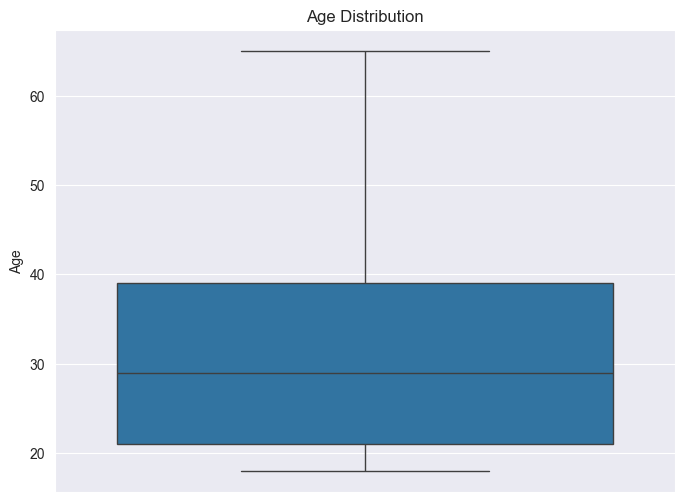

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'])
plt.title('Age Distribution')
plt.show()

# Visualizing the Composition of Data

## Box Plot of ConvertedCompYearly for the Top 5 Developer Types:

In [81]:
# Check Missing value
missing_con_comp = df['ConvertedCompYearly'].isnull().sum()
missing_con_comp

np.int64(42002)

In [83]:
# CHeck type
df['ConvertedCompYearly'].dtypes

dtype('float64')

In [74]:
# Show few row 

In [84]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())

In [86]:
# gain check any more missing value
missing_con_comp = df['ConvertedCompYearly'].isnull().sum()
missing_con_comp

np.int64(0)

In [90]:
xxx = df['ConvertedCompYearly'].value_counts()

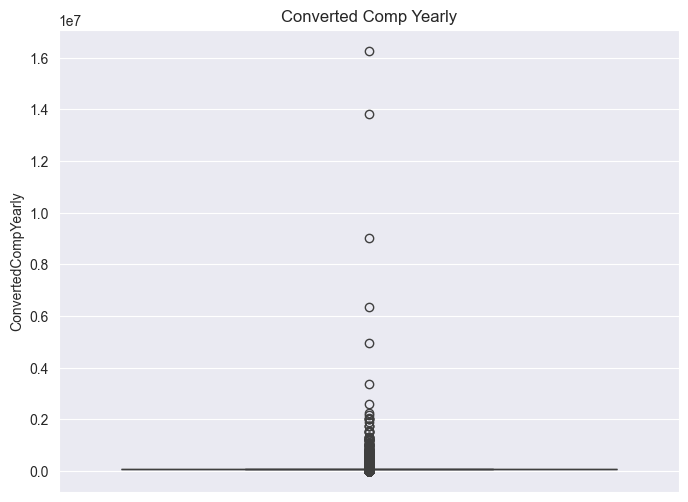

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedCompYearly'])
plt.title('Converted Comp Yearly')
plt.show()